In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Load Pre_Cleaned Data 

In [2]:
df = pd.read_csv('Data/food sales.csv')
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


# Initial Exploration

What is my dataset like?

In [3]:
df.shape

(8523, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Size           8523 non-null   object 
 6   Outlet_Location_Type  8523 non-null   object 
 7   Outlet_Type           8523 non-null   object 
 8   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), object(5)
memory usage: 599.4+ KB


In [5]:
df.describe(include = 'all').round(3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000,8523,8523.000,8523,8523.000,8523,8523,8523,8523.000
unique,NaN,2,NaN,16,NaN,3,3,4,NaN
top,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,NaN,5517,NaN,1232,NaN,5203,3350,5577,NaN
mean,12.858,NaN,0.066,NaN,140.993,NaN,NaN,NaN,2181.289
std,4.226,NaN,0.052,NaN,62.275,NaN,NaN,NaN,1706.500
min,4.555,NaN,0.000,NaN,31.290,NaN,NaN,NaN,33.290
25%,9.310,NaN,0.027,NaN,93.826,NaN,NaN,NaN,834.247
50%,12.858,NaN,0.054,NaN,143.013,NaN,NaN,NaN,1794.331
75%,16.000,NaN,0.095,NaN,185.644,NaN,NaN,NaN,3101.296


Data Types:

Numerical data: 

continuous - Item_Weight, Item_Visibility, Item_MRP, Item_Outlet_Sales

Categorical data:

ordinal - Outlet_Size

nominal - Item_Fat_Contentj, Item_Type, Outlet_Type, Outlet_Location_Type


# Visualizations for EDA

Univariate Visuals: Explore the distribution of each column of data

Histograms

boxplots

Bar charts

Multivariate Visuals: Explore relationships between variables and differences in groups

Scatterplots

Correlation Heatmaps

Multivariate bar charts or boxplots



## Univariate Visuals

Explore the distribution of each column of data!

### Bar Charts: Plotting Categorical Frequencies

In [6]:
# plot 1: The distribution of Item_Fat_Content
fat_counts = df['Item_Fat_Content'].value_counts().sort_values()

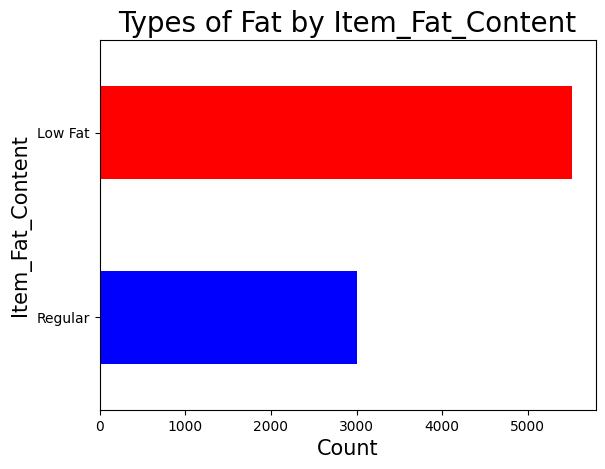

Regular    3006
Low Fat    5517
Name: Item_Fat_Content, dtype: int64

In [7]:
fat_counts.plot(kind = 'barh', color = ['blue','red'])
plt.title('Types of Fat by Item_Fat_Content', fontsize = 20)
plt.ylabel('Item_Fat_Content', fontsize = 15)
plt.xlabel('Count', fontsize = 15)

#Show your figure
plt.show()

#Display the count chart below the plot
fat_counts

In [8]:
# plot 2: distribution of Item_Type
type_counts = df['Item_Type'].value_counts().sort_values()
type_counts

Seafood                    64
Breakfast                 110
Starchy Foods             148
Others                    169
Hard Drinks               214
Breads                    251
Meat                      425
Soft Drinks               445
Health and Hygiene        520
Baking Goods              648
Canned                    649
Dairy                     682
Frozen Foods              856
Household                 910
Snack Foods              1200
Fruits and Vegetables    1232
Name: Item_Type, dtype: int64

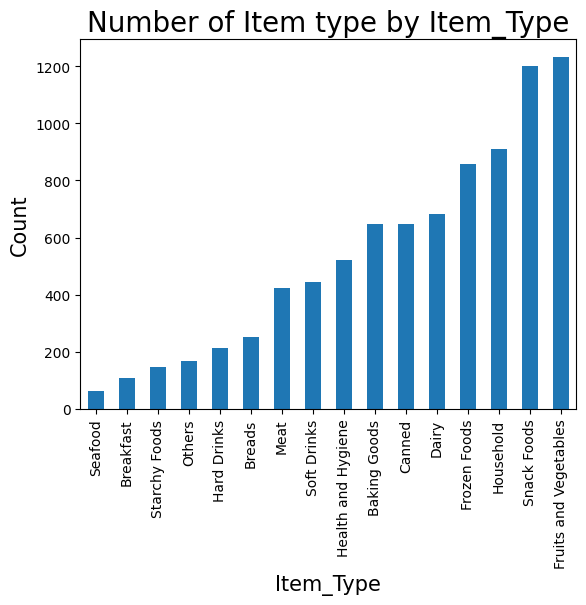

In [9]:
type_counts.plot(kind = 'bar')
plt.title('Number of Item type by Item_Type', fontsize = 20)
plt.xticks(rotation = 90)
plt.ylabel('Count', fontsize = 15)
plt.xlabel('Item_Type', fontsize = 15)

#Show your figure
plt.show()


In [10]:
# plot 3: distribution of 	Outlet_Size
size_counts = df['Outlet_Size'].value_counts().sort_values()
size_counts

High       932
Small     2388
Medium    5203
Name: Outlet_Size, dtype: int64

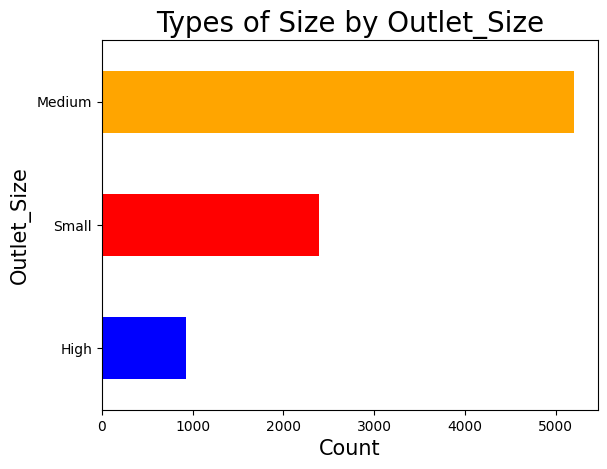

In [11]:
size_counts.plot(kind = 'barh', color = ['blue','red', 'orange'])
plt.title('Types of Size by Outlet_Size', fontsize = 20)
plt.ylabel('Outlet_Size', fontsize = 15)
plt.xlabel('Count', fontsize = 15)

#Show your figure
plt.show()

In [12]:
# plot 4: distribution of Outlet_Location_Type
location_type_counts = df['Outlet_Location_Type'].value_counts().sort_values()
location_type_counts

Tier 1    2388
Tier 2    2785
Tier 3    3350
Name: Outlet_Location_Type, dtype: int64

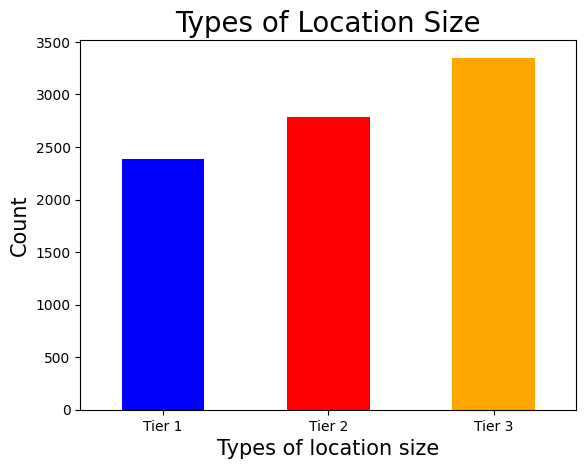

In [13]:
location_type_counts.plot(kind = 'bar', color = ['blue','red', 'orange'])
plt.title('Types of Location Size', fontsize = 20)
plt.xticks(rotation = 360)
plt.ylabel('Count', fontsize = 15)
plt.xlabel('Types of location size', fontsize = 15)

#Show your figure
plt.show()

In [14]:
# plot 5: distribution of Outlet_Type
outlet_type_counts = df['Outlet_Type'].value_counts().sort_values()
outlet_type_counts

Supermarket Type2     928
Supermarket Type3     935
Grocery Store        1083
Supermarket Type1    5577
Name: Outlet_Type, dtype: int64

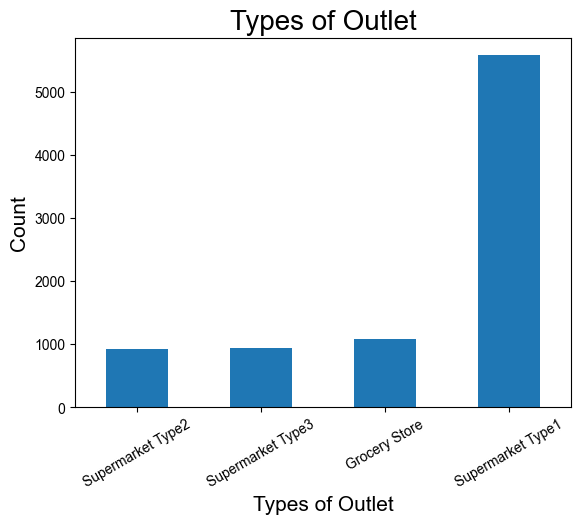

In [15]:
outlet_type_counts.plot(kind = 'bar')
plt.style.use('seaborn')
plt.title('Types of Outlet', fontsize = 20)
plt.xticks(rotation = 30)
plt.ylabel('Count', fontsize = 15)
plt.xlabel('Types of Outlet', fontsize = 15)

#Show your figure
plt.show()

### Histograms: Plotting Continuous Distributions

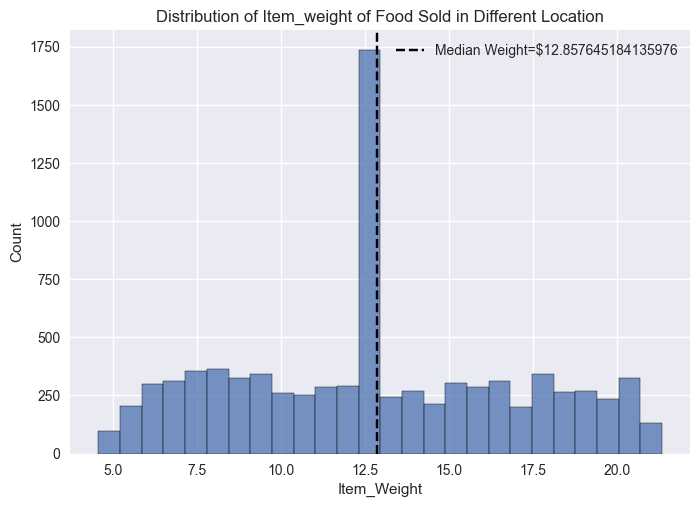

In [20]:
# plot 6(seaborn) distributoin of the item-weight column.
ax = sns.histplot(data=df, x='Item_Weight')

median = df['Item_Weight'].median()

ax.set(title='Distribution of Item_weight of Food Sold in Different Location')

ax.axvline(median, color='k', ls='--', 
            label=f'Median Weight=${median}')
ax.legend();


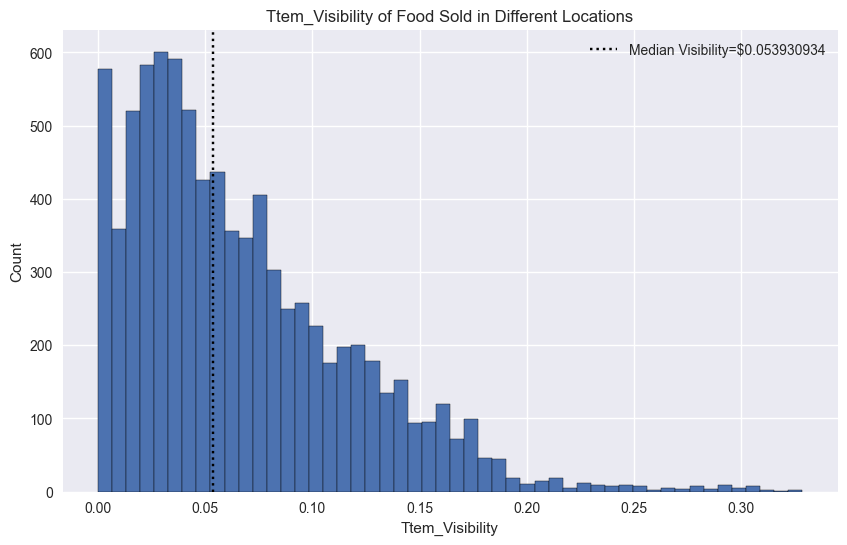

In [22]:
# plot 7: distribution of Item_Visibility
plt.figure(figsize = (10,6))
plt.hist(df['Item_Visibility'], bins = 'auto', edgecolor='black')

median = df['Item_Visibility'].median()

plt.xlabel('Ttem_Visibility')
plt.ylabel('Count')
plt.title('Ttem_Visibility of Food Sold in Different Locations')

plt.axvline(median, color='k', ls=':', 
            label=f'Median Visibility=${median}')
plt.legend();

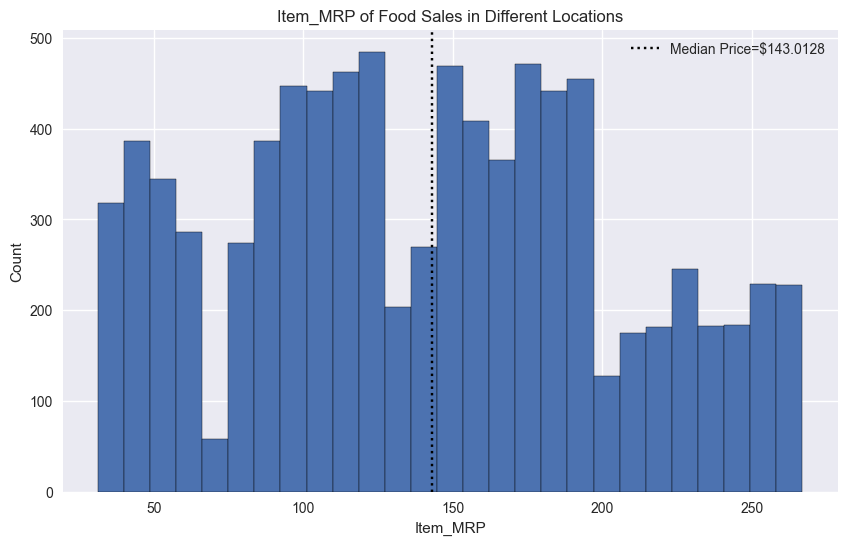

In [23]:
# plot 8: distribution of Item_MRP
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df['Item_MRP'], bins = 'auto', edgecolor='black')

median = df['Item_MRP'].median()

ax.set(xlabel='Item_MRP', ylabel='Count',
       title='Item_MRP of Food Sales in Different Locations')

ax.axvline(median, color='k', ls=':', 
            label=f'Median Price=${median}')
ax.legend();

### Target Feature: Item_Outlet_Sales

First, visual of the distribution of the sales

Next, visual of the outliers of the sales.

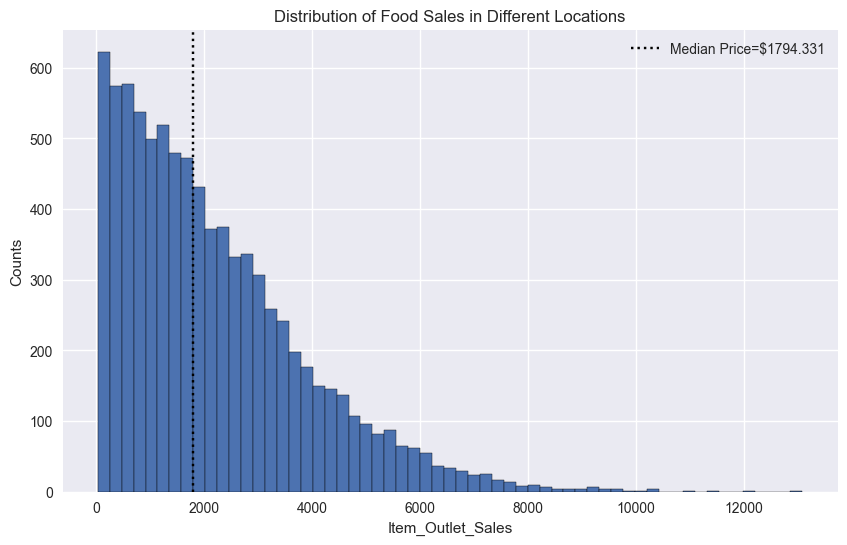

In [24]:
# plot 1: histogram of distribution of the sales
ax = df['Item_Outlet_Sales'].hist(figsize=(10,6), bins = 'auto', edgecolor='black')

median = df['Item_Outlet_Sales'].median()

ax.set(xlabel='Item_Outlet_Sales', ylabel='Counts',
       title='Distribution of Food Sales in Different Locations')

ax.axvline(median, color='k', ls=':', 
            label=f'Median Price=${median}')
ax.legend();

<AxesSubplot:xlabel='Item_Outlet_Sales'>

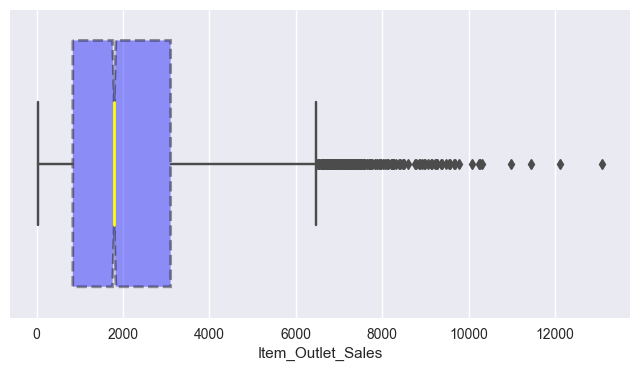

In [32]:
# plot 2: boxplot to show if there are any outliers in the sales.
fig, ax = plt.subplots(figsize = (8,4))

sns.boxplot(data = df, x='Item_Outlet_Sales',
                notch = True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4))



In [34]:
# check the summary statistics of the sales.
df['Item_Outlet_Sales'].describe().round(1)

count     8523.0
mean      2181.3
std       1706.5
min         33.3
25%        834.2
50%       1794.3
75%       3101.3
max      13087.0
Name: Item_Outlet_Sales, dtype: float64

According to the results of our df.describe() above:

First Quartile (Q1) = 834.2

Third Quartile (Q3) = 3101.3

Interquartile Range (IQR) = Q3 - Q1 = 2267.1

1.5 * IQR = 3400.65

'Minimum' (before outliers) is Q1 - 2267.1 = -2566.45

'Maximum' (before outliers) is Q3 + 2267.1 = 5368.4

Notice below that the lower whisker is negative,the minmum value is 33.3. The plot does not cover non-existent values, and the upper whisker is at 5368.4

From the above plot, We can see a lot outliers above 5368.4

### Check outliers of other numerical features

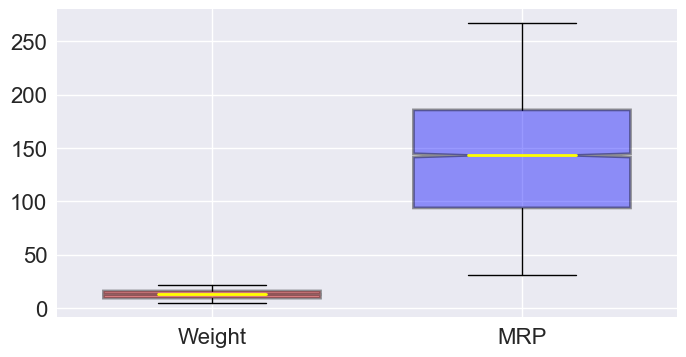

In [38]:
weight = df['Item_Weight']
MRP = df['Item_MRP']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,4))
boxplots = axes.boxplot([weight, MRP],
           notch = True,
           labels=['Weight', 'MRP'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );

boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);



we can see that there are no outliers in item weight and item MRP columns.

## Multivariate Visuals

Explore relationships between variables and differences in groups!

### Looking for Correlatioins

In [39]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.567574
Item_Outlet_Sales,0.011550,-0.128625,0.567574,1.000000


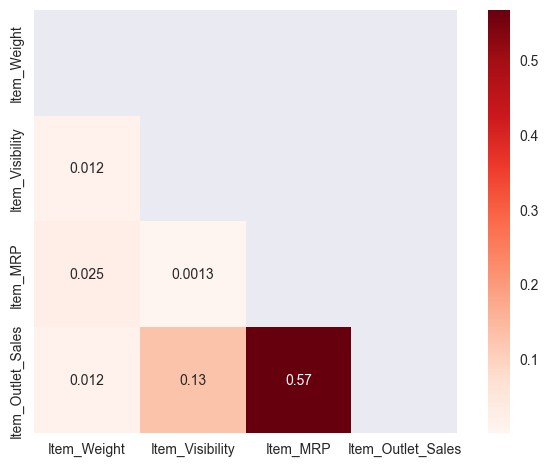

In [40]:
# visualiing correlation with a heatmap.
corr = df.corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, cmap='Reds', annot=True, mask=mask);

As we can see that, for our numerical features, there is only Item_MRP has a moderate correlation with sales.

### Correlation with Scatter plots

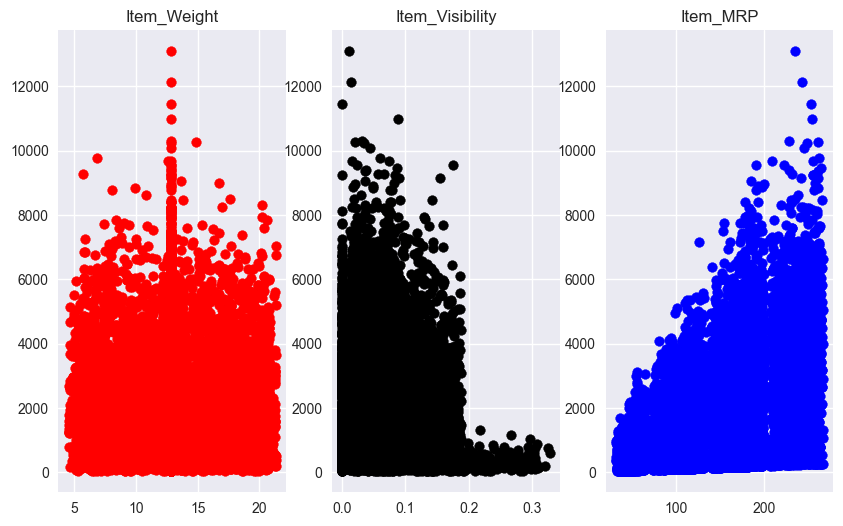

In [43]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(10,6));
# Subplot 1 
axes[0].scatter(df['Item_Weight'], df['Item_Outlet_Sales'], c= 'r');
axes[0].set_title('Item_Weight', fontsize = 12);

# Subplot 2
axes[1].scatter(df['Item_Visibility'], df['Item_Outlet_Sales'], c= 'k');
axes[1].set_title('Item_Visibility', fontsize = 12);

# Subplot 2
axes[2].scatter(df['Item_MRP'], df['Item_Outlet_Sales'], c= 'b');
axes[2].set_title('Item_MRP', fontsize = 12);

we can see that item weight has no correlation with sales
           
            item visibility has negative correlation with sales
            
            Item_mrp has positive correlation with sales.

### Group by Categorical columns to make bar charts

In [49]:
fat_sale = df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean()
fat_sale

Item_Fat_Content
Low Fat    2157.711534
Regular    2224.561170
Name: Item_Outlet_Sales, dtype: float64

(array([0, 1]), [Text(0, 0, 'Low Fat'), Text(1, 0, 'Regular')])

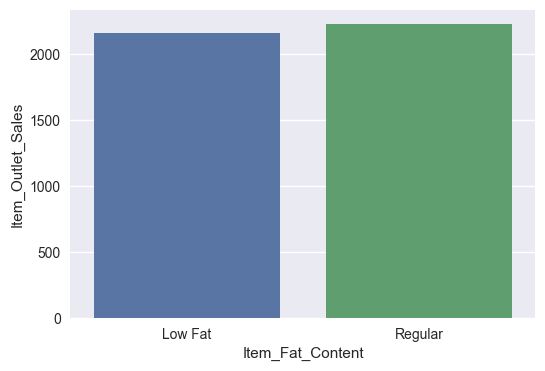

In [54]:
# plot the sales of the food with different fat content.
plt.figure(figsize = (6,4))
sns.barplot(x=fat_sale.index, y=fat_sale.values)
plt.ylabel('Item_Outlet_Sales')
plt.xlabel('Item_Fat_Content')
plt.xticks(rotation=360)

In [55]:
item_type_sale = df.groupby('Item_Type')['Item_Outlet_Sales'].mean()

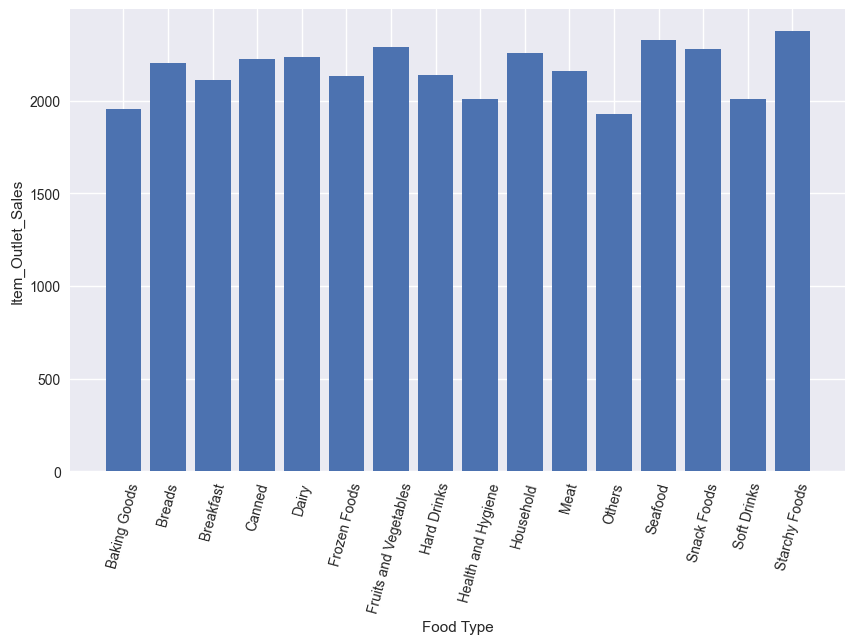

In [59]:
# plot the sales of food with different food type.
plt.figure(figsize = (10,6))
plt.bar(item_type_sale.index, item_type_sale.values)
plt.ylabel('Item_Outlet_Sales')
plt.xlabel('Food Type')
plt.xticks(rotation=75);

In [60]:
outlet_size_sale = df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean()

In [61]:
location_type_sale = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean()

In [62]:
outlet_type_sale = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()

C:\Users\qfu88\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\qfu88\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\qfu88\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

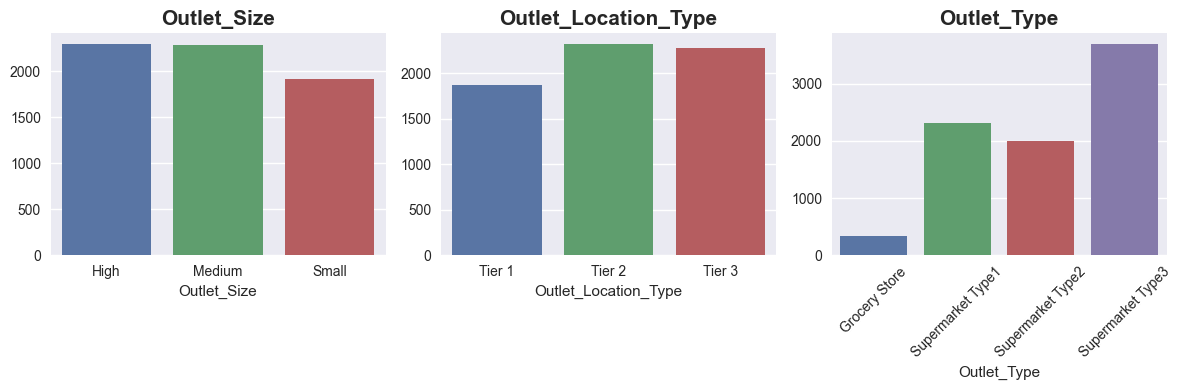

In [68]:
fig, axes = plt.subplots(ncols=3, figsize=(12,4))

sns.barplot(outlet_size_sale.index, outlet_size_sale.values, ax=axes[0])
axes[0].set_title('Outlet_Size', fontsize = 15, fontweight = 'bold')

sns.barplot(location_type_sale.index, location_type_sale.values, ax=axes[1])
axes[1].set_title('Outlet_Location_Type', fontsize = 15, fontweight = 'bold')

sns.barplot(outlet_type_sale.index, outlet_type_sale.values, ax=axes[2])
axes[2].set_title('Outlet_Type', fontsize = 15, fontweight = 'bold')
axes[2].tick_params(axis="x", rotation=45)


fig.tight_layout()


we can see that there is no significant difference of the sales between the different outlet sizej and the different outlet location type.

But the sales gap between different outlet type can be considered as big.
  
     